# Mapeo de Arnold (cat)



In [1]:
using PyPlot

In [2]:
push!(LOAD_PATH,"/home/evelyn/Documentos/Tesis/Programas/IPM")

3-element Array{Any,1}:
 "/home/evelyn/julia0.6/julia-903644385b/local/share/julia/site/v0.6"
 "/home/evelyn/julia0.6/julia-903644385b/share/julia/site/v0.6"      
 "/home/evelyn/Documentos/Tesis/Programas/IPM"                       

In [5]:
Pkg.clone("https://github.com/andreasnoack/LinearAlgebra.jl")

INFO: Cloning LinearAlgebra from https://github.com/andreasnoack/LinearAlgebra.jl
INFO: Computing changes...
INFO: Upgrading LaTeXStrings: v0.2.1 => v0.3.0
INFO: Upgrading MacroTools: v0.3.7 => v0.4.0
INFO: Upgrading MbedTLS: v0.5.0 => v0.5.1
INFO: Upgrading StaticArrays: v0.6.3 => v0.6.4
INFO: Upgrading ZMQ: v0.4.3 => v0.5.0
- LaTeXStrings
- MacroTools
- MbedTLS
- ZMQ
Restart Julia to use the updated versions.
INFO: Building MbedTLS
INFO: Building ZMQ
  likely near /home/evelyn/.julia/v0.6/ZMQ/deps/build.jl:36


In [3]:

using ParametrizacionMetodo

In [4]:
function Arnold(x,y,a,b)
    x_n = mod(2*x+y,1)
    y_n = mod(x+y,1)
    return [x_n,y_n]
end

Arnold (generic function with 1 method)

In [5]:
function evaluar(Tiempo, paso,A,B)
    ValX=Float64[]
    
    ValY=Float64[]

    for t = Tiempo[1]:paso:Tiempo[2]
        
        x = mod(evaluate(A,t),1)
        y = mod(evaluate(B,t),1)
        
        push!(ValX,x)
        push!(ValY,y)
        
    end
    return ValX,ValY
    
end

evaluar (generic function with 1 method)

In [6]:

t1=[-big(1.5),big(1.5)]
t2=[-big(1.5),big(1.5)]
Polinomio1F,E1F,Cx1,Cy1 = MetParametrización(Arnold,1., 20, [big(0.),big(0.)], big(3.), big(1.), 1, t1, 0.125)
Polinomio2F,E2F,Cx2,Cy2 = MetParametrización(Arnold,1., 20, [big(0.),big(0.)], big(3.), big(1.), 2, t2, 0.125)
V=evaluar(t1,0.025,Polinomio2F[1],Polinomio2F[2])
B=evaluar(t2,0.025,Polinomio1F[1],Polinomio1F[2])


Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] big(::Array{Float64,2}) at ./deprecated.jl:57
 [3] EigenValores(::Array{BigFloat,2}) at /home/evelyn/Documentos/Tesis/Programas/IPM/ParametrizacionMetodoIPM_Mejoras.jl:127
 [4] Orden1(::Array{TaylorSeries.TaylorN{BigFloat},1}, ::Array{TaylorSeries.TaylorN{BigFloat},1}, ::#Arnold, ::BigFloat, ::BigFloat, ::Array{BigFloat,1}, ::Int64, ::Array{BigFloat,1}, ::Array{BigFloat,1}) at /home/evelyn/Documentos/Tesis/Programas/IPM/ParametrizacionMetodoIPM_Mejoras.jl:197
 [5] Variedades(::#Arnold, ::Int64, ::Array{BigFloat,1}, ::BigFloat, ::BigFloat, ::Int64) at /home/evelyn/Documentos/Tesis/Programas/IPM/ParametrizacionMetodoIPM_Mejoras.jl:265
 [6] MetParametrización(::Function, ::Float64, ::Int64, ::Array{BigFloat,1}, ::BigFloat, ::BigFloat, ::Int64, ::Array{BigFloat,1}, ::Float64) at /home/evelyn/Documentos/Tesis/Programas/IPM/ParametrizacionMetodoIPM_Mejoras.jl:486
 [7] include_string(::String, ::String) at ./loading.jl:51

([0.211403, 0.224547, 0.23769, 0.250833, 0.263976, 0.27712, 0.290263, 0.303406, 0.31655, 0.329693  …  0.657164, 0.670307, 0.68345, 0.696594, 0.709737, 0.72288, 0.736024, 0.749167, 0.76231, 0.775453], [0.275976, 0.25471, 0.233444, 0.212177, 0.190911, 0.169645, 0.148379, 0.127112, 0.105846, 0.0845798  …  0.936686, 0.91542, 0.894154, 0.872888, 0.851621, 0.830355, 0.809089, 0.787823, 0.766556, 0.74529])

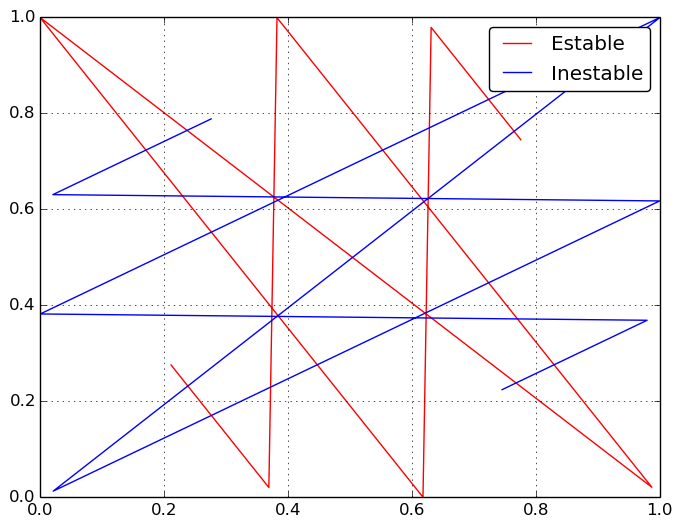

PyObject <matplotlib.legend.Legend object at 0x7f6c97ed7cd0>

In [7]:
figure(1)
#pygui(true)
plot(B[1],B[2],color="r",label="Estable")
plot(V[1],V[2],color="b",label="Inestable")
xlim(0,1)
ylim(0,1)
#title("Mapeo exponencial con a=$a ,BigFloat, orden 40")
grid("on")
legend(loc="upper right",fancybox="true" )


El siguiente error es puesto que no puede graficar bigFloat 

In [22]:
figure(2)
plot(E1F[1],E1F[2], label="Estable")
plot(E2F[1],E2F[2], label="Inestable")
#xlabel("Parámetro t")
#ylabel(L"log10($|| E||_{\infty})$")
#title("Error")
#grid("on")
#legend(loc="upper right",fancybox="true" )



LoadError: [91mPyError (ccall(@pysym(:PyImport_ImportModule), PyPtr, (Cstring,), name)

The Python package mpmath could not be found by pyimport. Usually this means
that you did not install mpmath in the Python version being used by PyCall.

PyCall is currently configured to use the Python version at:

/usr/bin/python

and you should use whatever mechanism you usually use (apt-get, pip, conda,
etcetera) to install the Python package containing the mpmath module.

One alternative is to re-configure PyCall to use a different Python
version on your system: set ENV["PYTHON"] to the path/name of the python
executable you want to use, run Pkg.build("PyCall"), and re-launch Julia.

Another alternative is to configure PyCall to use a Julia-specific Python
distribution via the Conda.jl package (which installs a private Anaconda
Python distribution), which has the advantage that packages can be installed
and kept up-to-date via Julia.  As explained in the PyCall documentation,
set ENV["PYTHON"]="", run Pkg.build("PyCall"), and re-launch Julia. Then,
To install the mpmath module, you can use `pyimport_conda("mpmath", PKG)`,
where PKG is the Anaconda package the contains the module mpmath,
or alternatively you can use the Conda package directly (via
`using Conda` followed by `Conda.add` etcetera).

) <type 'exceptions.ImportError'>
ImportError('No module named mpmath',)
[39m

In [ ]:
figure(3)
converX1=[]
converY1=[]
converX2=[]
converY2=[]
for i in 1:length(Cx1)-1
    push!(converX1,Cx1[i][1][1])
    push!(converY1,Cy1[i][1][1])
    push!(converX2,Cx2[i][1][1])
    push!(converY2,Cy2[i][1][1])
    
end
plot(converX1,marker=".",label=L"P(x) Estable")
plot(converY1,marker=".",label=L"P(y) Estable")
plot(converX2,marker="*",label=L"P(x) Inestable")
plot(converY2,marker="*",label=L"P(y) Inestable")

title("Convergencia")
xlabel("Orden")
ylabel(L"$a_{n+1}/a_{n}$")
legend(loc="upper right",fancybox="true" )


In [30]:

t=[-5.,5.]
Polinomio1G, E1G, ValProp1,C1,C2 = MetParametrización(Arnold,1., 25, [0.,0.], 3., 1., 1, t, 0.125)
Polinomio2G, E2G, ValProp2 ,c1,c2= MetParametrización(Arnold,1., 25, [0.,0.], 3., 1., 2, t, 0.125)
V=evaluar(t,0.025,Polinomio2G[1],Polinomio2G[2])
B=evaluar(t,0.025,Polinomio1G[1],Polinomio1G[2])



Stacktrace:
 [1] depwarn(::String, ::Symbol) at ./deprecated.jl:70
 [2] mod(::Array{TaylorSeries.Taylor1{Float64},1}, ::Float64) at ./deprecated.jl:57
 [3] Invariancia(::#Arnold, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Float64, ::Float64, ::Array{Float64,1}, ::Float64) at /home/evelyn/Documentos/Tesis/Programas/IPM/ParametrizacionMetodoIPM_Mejoras.jl:360
 [4] CalculoError(::Function, ::Float64, ::Float64, ::Array{Float64,1}, ::Float64, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{TaylorSeries.Taylor1{Float64},1}, ::Array{Float64,1}, ::Float64) at /home/evelyn/Documentos/Tesis/Programas/IPM/ParametrizacionMetodoIPM_Mejoras.jl:471
 [5] MetParametrización(::Function, ::Float64, ::Int64, ::Array{Float64,1}, ::Float64, ::Float64, ::Int64, ::Array{Float64,1}, ::Float64) at /home/evelyn/Documentos/Tesis/Programas/IPM/ParametrizacionMetodoIPM_Mejoras.jl:508
 [6] include_string(::String, ::String) at ./loading.jl:515
 [7] include_string(::Modul

LoadError: [91mBoundsError: attempt to access (TaylorSeries.Taylor1{Float64}[ 0.5257311121191335 t + 𝒪(t²⁶),  - 0.8506508083520399 t + 𝒪(t²⁶)], Array{Float64,1}[[-5.0, -4.875, -4.75, -4.625, -4.5, -4.375, -4.25, -4.125, -4.0, -3.875, -3.75, -3.625, -3.5, -3.375, -3.25, -3.125, -3.0, -2.875, -2.75, -2.625, -2.5, -2.375, -2.25, -2.125, -2.0, -1.875, -1.75, -1.625, -1.5, -1.375, -1.25, -1.125, -1.0, -0.875, -0.75, -0.625, -0.5, -0.375, -0.25, -0.125, 0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0.875, 1.0, 1.125, 1.25, 1.375, 1.5, 1.625, 1.75, 1.875, 2.0, 2.125, 2.25, 2.375, 2.5, 2.625, 2.75, 2.875, 3.0, 3.125, 3.25, 3.375, 3.5, 3.625, 3.75, 3.875, 4.0, 4.125, 4.25, 4.375, 4.5, 4.625, 4.75, 4.875, 5.0], [6.93889e-16, 6.76542e-16, 6.59195e-16, 6.41848e-16, 6.245e-16, 6.07153e-16, 5.89806e-16, 5.72459e-16, 5.55112e-16, 5.37764e-16, 5.20417e-16, 5.0307e-16, 4.85723e-16, 4.68375e-16, 4.51028e-16, 4.33681e-16, 4.16334e-16, 3.98986e-16, 3.81639e-16, 3.64292e-16, 3.46945e-16, 3.29597e-16, 3.1225e-16, 2.94903e-16, 2.77556e-16, 2.60209e-16, 2.42861e-16, 2.25514e-16, 2.08167e-16, 1.9082e-16, 1.73472e-16, 1.56125e-16, 1.38778e-16, 1.21431e-16, 1.04083e-16, 8.67362e-17, 6.93889e-17, 5.20417e-17, 3.46945e-17, 1.73472e-17, 0.0, 1.73472e-17, 3.46945e-17, 5.20417e-17, 6.93889e-17, 8.67362e-17, 1.04083e-16, 1.21431e-16, 1.38778e-16, 1.56125e-16, 1.73472e-16, 1.9082e-16, 2.08167e-16, 2.25514e-16, 2.42861e-16, 2.60209e-16, 2.77556e-16, 2.94903e-16, 3.1225e-16, 3.29597e-16, 3.46945e-16, 3.64292e-16, 3.81639e-16, 3.98986e-16, 4.16334e-16, 4.33681e-16, 4.51028e-16, 4.68375e-16, 4.85723e-16, 5.0307e-16, 5.20417e-16, 5.37764e-16, 5.55112e-16, 5.72459e-16, 5.89806e-16, 6.07153e-16, 6.245e-16, 6.41848e-16, 6.59195e-16, 6.76542e-16, 6.93889e-16]], Any[], Any[])
  at index [5][39m

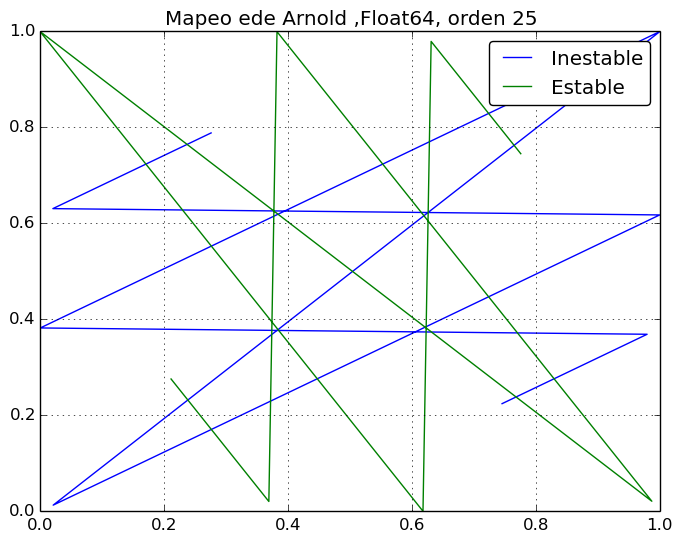

PyObject <matplotlib.legend.Legend object at 0x7f6c9782f590>

In [33]:
figure(4)
#pygui(true)
plot(V[1],V[2],label="Inestable")
plot(B[1],B[2],label="Estable")
xlim(0.,1.)
ylim(0.,1.)
grid("on")
title("Mapeo de Arnold ,Float64, orden 25")
legend(loc="upper right",fancybox="true" )




In [ ]:
figure(5)
plot(E1G[1],log10(E1G[2]),marker= "None", label="Estable")
plot(E2G[1],log10(E2G[2]),marker= "None", label="Inestable")
xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
grid("on")
legend(loc="upper right",fancybox="true" )



In [ ]:
figure(6)
conver1=[]
conver2=[]
conv1=[]
conv2=[]
for i in 1:length(C1)-1
    push!(conver1,C1[i][1][1])
    push!(conver2,C2[i][1][1])
    push!(conv1,c1[i][1][1])
    push!(conv2,c2[i][1][1])
    
end
plot(conver1,marker=".",label=L"P(x) Estable")
plot(conver2,marker=".",label=L"P(y) Estable")
plot(conv1,marker="*",label=L"P(x) Inestable")
plot(conv2,marker="*",label=L"P(y) Inestable")

title("Convergencia")
xlabel("Orden")
ylabel(L"$a_{n+1}/a_{n}$")
#ylim(-.2,.2)
legend(loc="upper right",fancybox="true" )



for a in 1.:0.1:6.0
    Polinomio1,E1,ValProp1 = MetParametrización(Rotor,1., 25, [1.,0.], a, 1., 1, 50., 0.125, Float64)
    Polinomio2,E2,ValProp2 = MetParametrización(Rotor,1., 25, [1.,0.], a, 1., 2, 50., 0.125, Float64)
    V=Graficar(1500.7,0.025,8.,1.,Polinomio2[1],Polinomio2[2],"E1")
    B=Graficar(1500.7,0.025,8.,1.,Polinomio1[1],Polinomio1[2],"E1")
    pygui(true)
    plot3D(B[2],B[1],a,zdir="z",color="b",alpha=0.3)
    plot3D(V[2],V[1],a,zdir="z",color="r",alpha=0.3)
    xlim(-20,20)
    ylim(-20,20)
    xlabel("X")
    ylabel("Y")
    zlabel("Parámetro")
    title("Variedades")
    
end
    

In [ ]:
for a in 3.1:0.4:13.6
    #x1,x2=Parametro(a)
    #c=["r","b","b","r","b","g","o","b","b"]
    t=[-20.,20.]
    Polinomio1,E1,ValProp1 = MetParametrización(Rotor,2., 45, [1.,0.], a, 1., 1, t, 0.125)
    Polinomio2,E2,ValProp2 = MetParametrización(Rotor,2., 45, [1.,0.], a, 1., 2, t, 0.125)
    V=evaluar(t,0.25,Polinomio2[1],Polinomio2[2])
    B=evaluar(t,0.25,Polinomio1[1],Polinomio1[2])
    pygui(true)
    plot(B[1],B[2])
    plot(V[1],V[2])
    xlim(-40,40)
    ylim(-40,40)
end